In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\repository\understat_shot_data\shots_data.csv") ##path to your data

<ipython-input-3-d9e6c793e167>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['isGoal'] = pdf['result'].map({"Goal":1, "MissedShots":0, "SavedShot": 0,


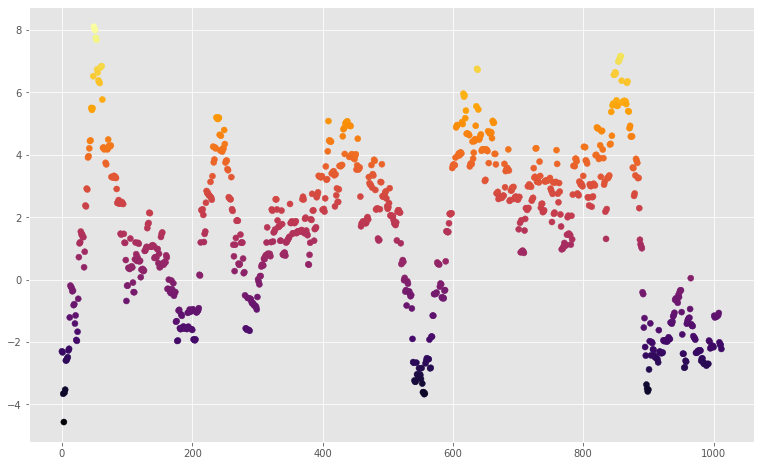

In [3]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

cmap_name = 'inferno'
player_name = "Lionel Messi"
pdf = df.query("player == @player_name & situation !='Penalty'")
pdf['isGoal'] = pdf['result'].map({"Goal":1, "MissedShots":0, "SavedShot": 0,
                                   'BlockedShot':0, 'ShotOnPost':0})

expected = pdf['xG'].rolling(50).sum().values
actual = pdf['isGoal'].rolling(50).sum().values
difference = actual - expected
difference = difference[~np.isnan(difference)]

fig, ax = plt.subplots(figsize=(13, 8))

scat = ax.scatter(range(len(difference)), difference, c=difference, cmap=cmap_name)

1013


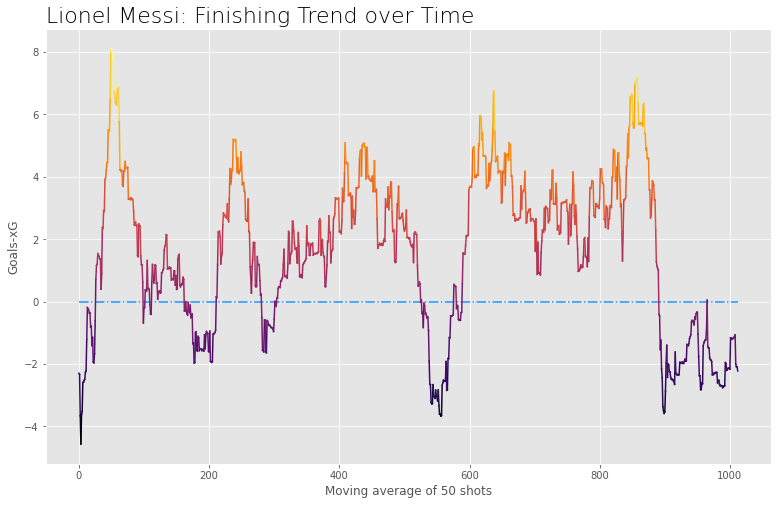

In [4]:
colors = scat.get_facecolors()
print(len(colors))
ax.plot([0, len(difference)], [0,0], color='dodgerblue', zorder=1, linestyle="-.")
for num, (x0, x1, col) in enumerate(zip(difference[:-1], difference[1:], colors)):
        ax.plot([num, num+1], [x0, x1], color=col, zorder=2)
scat.set_alpha(0)
ax.set(xlabel="Moving average of 50 shots", ylabel="Goals-xG")
ax.title.set(text = f"{player_name}: Finishing Trend over Time", ha='left', fontweight='light', 
             fontsize=22, x=0)
fig

In [5]:
fig.savefig(f"final_{player_name}.png")